In [2]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift
from scipy import signal
import scipy

import sys
# adding signal_handling to the system path
sys.path.insert(0, '../signal_handling/')
sys.path.insert(0, '../nft_handling/')

import signal_generation as sg
import test_signals as ts
import nft_analyse as nft

import matplotlib
import matplotlib.pyplot as plt

from importlib import reload
reload(sg)
reload(ts)

import random

from datetime import datetime

In [3]:
n_t = 2 ** 12
dt = 16. / n_t



t = np.array([(i - n_t / 2) * dt for i in range(n_t)])
t_span = t[-1] - t[0]

print(dt * (n_t - 1))
print(t[-1] - t[0])

15.99609375
15.99609375


In [4]:
# w_const = 2. * np.pi
w_const = 1.
w = fftshift([(i - n_t / 2) * (w_const / t_span) for i in range(n_t)])
w_t = ifftshift(w)  # ifftshift(fftfreq(n_t, d=dt))

f = np.zeros(n_t, dtype=complex)
f2 = np.zeros(n_t, dtype=complex)
q_t = np.zeros(n_t, dtype=complex)
s_args = [0.2, 0.5]
f_shift = 1. / 0.2
for k in range(n_t):
    f[k] = sg.srrcos_spec(w_t[k], s_args) * (1 + np.exp(-1j * 2 * np.pi * s_args[0] * w_t[k]))
    # f2[k] = f[k] * np.exp(-1j * 2 * np.pi * s_args[0] * w_t[k])
    q_t[k] = sg.srrcos(t[k], s_args)

q = ifftshift(ifft(fftshift(f)))
# q2 = ifftshift(ifft(fftshift(f2)))

In [62]:
w_fft = ifftshift(fftfreq(n_t, d=dt))

NameError: name 'w_fft' is not defined

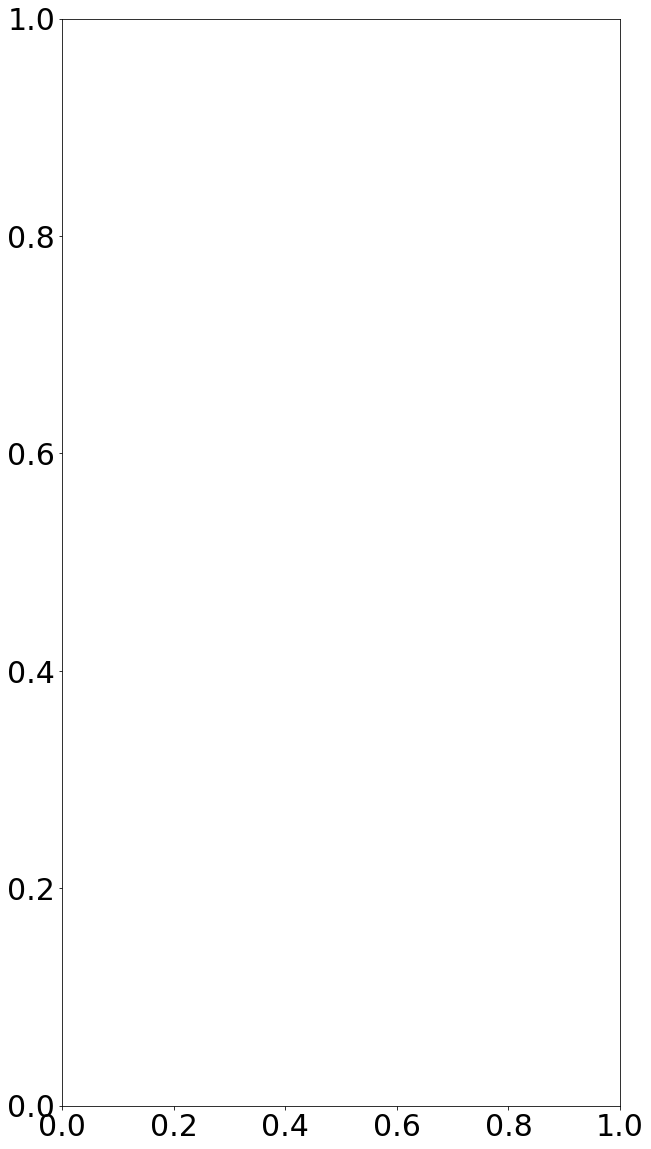

In [5]:
matplotlib.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(1, 1, figsize=(10,20))
axs.plot(w_fft, 'blue', linewidth=7)
axs.plot(w_t, 'yellow', linewidth=3)
# axs[0].set_xlim(-10, 10)
axs.set_xlabel('Freq')
axs.set_ylabel('|q(w)|')
axs.grid(True)

NameError: name 'q2' is not defined

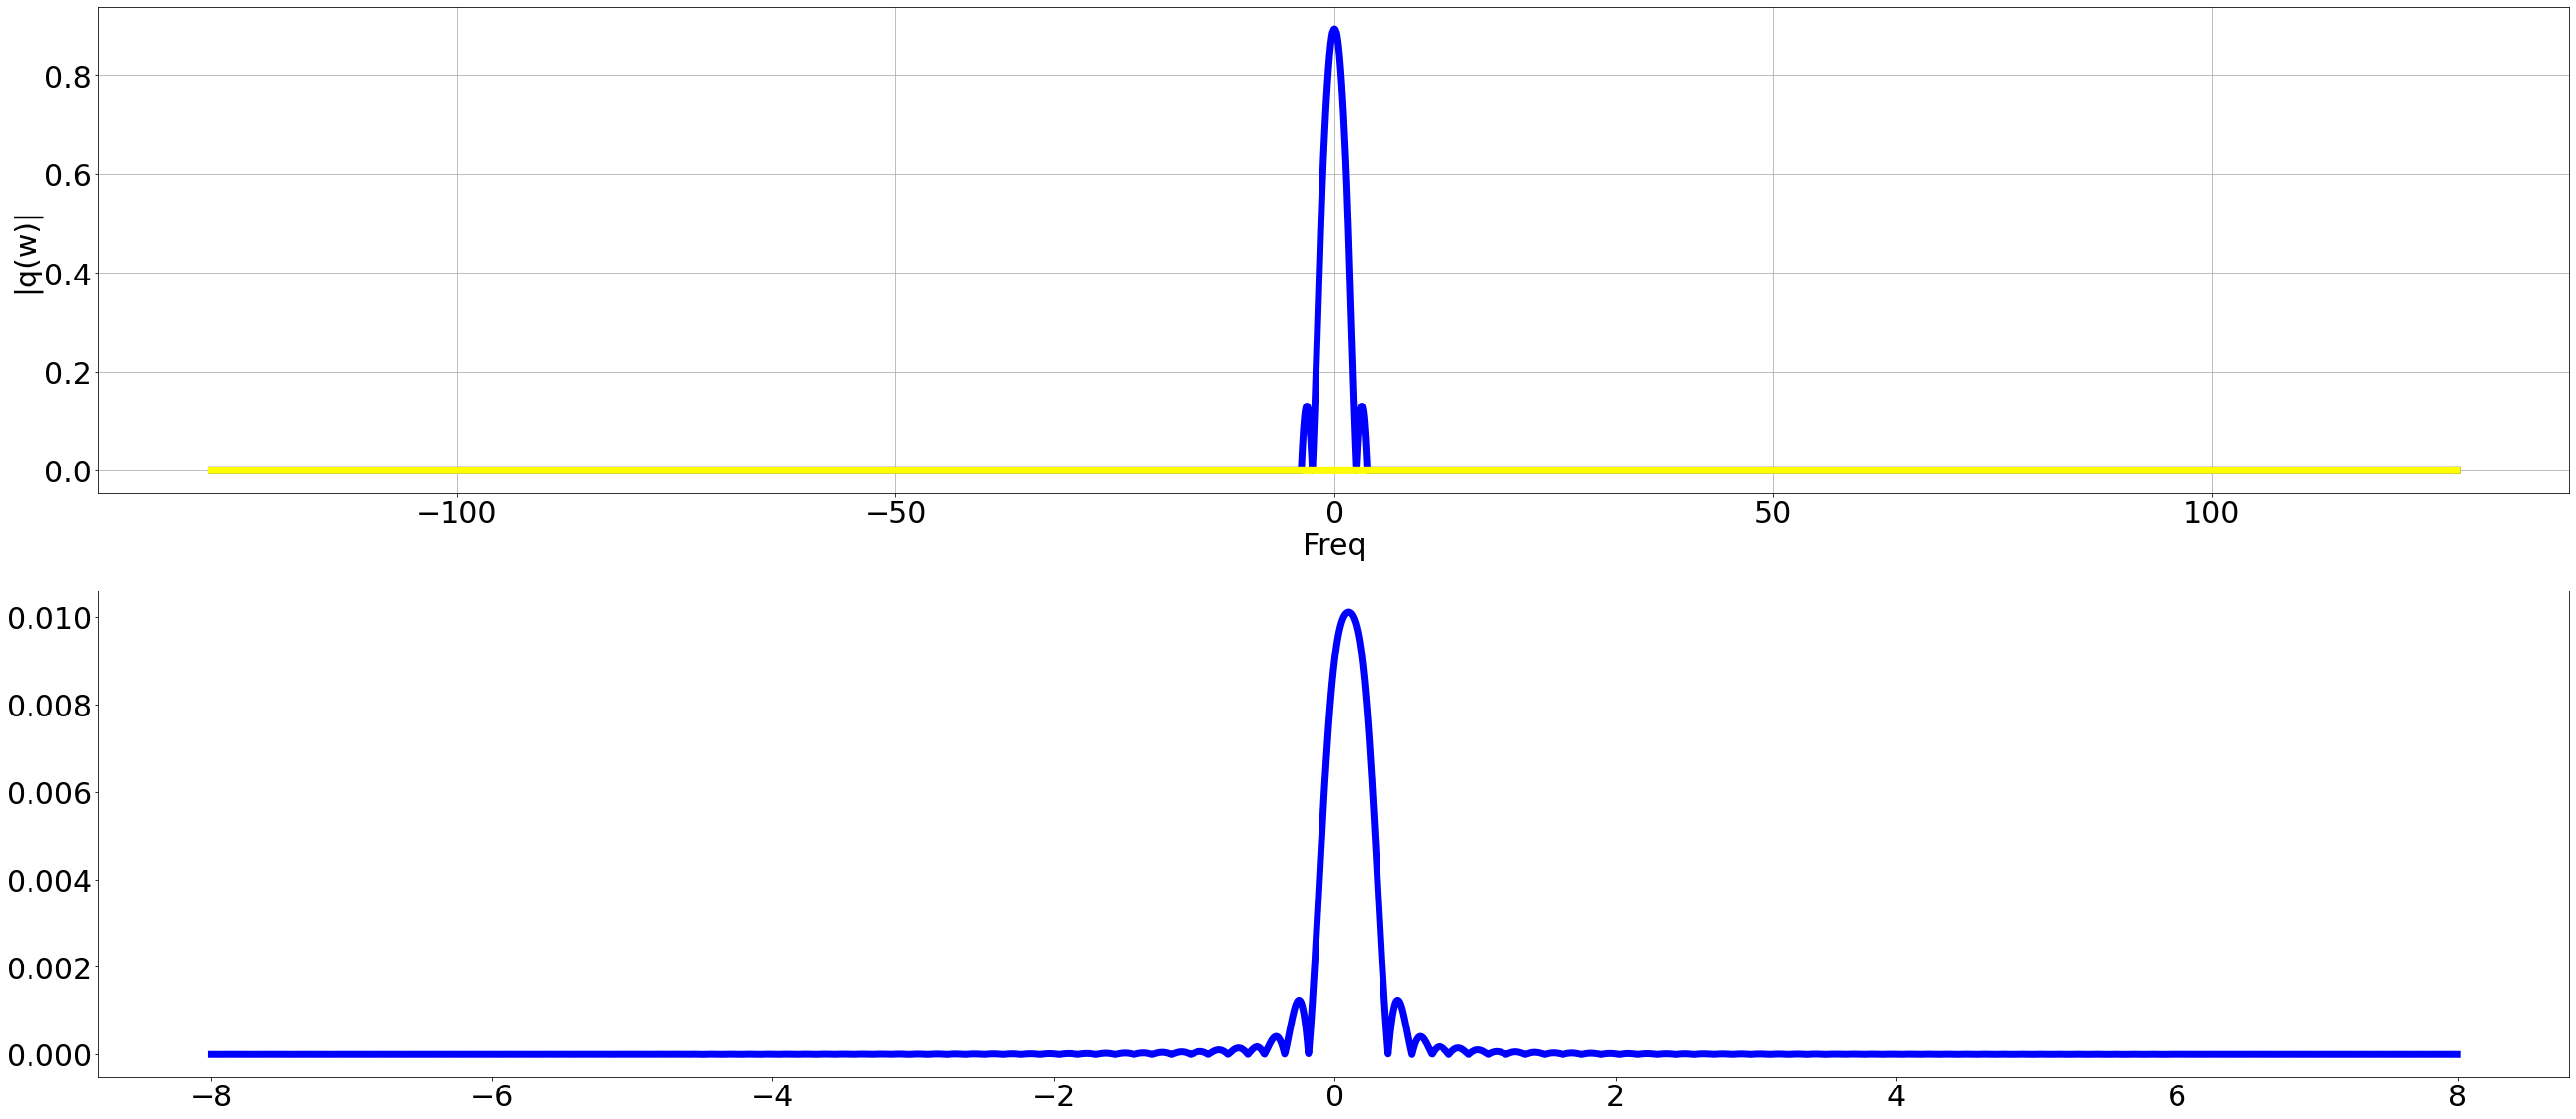

In [6]:
matplotlib.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(2, 1, figsize=(45,20))
axs[0].plot(w_t, np.absolute(f), 'blue', linewidth=7)
axs[0].plot(w_t, np.absolute(f2), 'yellow', linewidth=7)
# axs[0].set_xlim(-10, 10)
axs[0].set_xlabel('Freq')
axs[0].set_ylabel('|q(w)|')
axs[0].grid(True)

axs[1].plot(t, np.absolute(q), 'blue', linewidth=7)
axs[1].plot(t, np.absolute(q2), 'yellow', linewidth=7)
# axs[1].plot(t, np.absolute(ifftshift(ifft(f))), 'yellow', linewidth=7)
# axs[1].plot(t, np.absolute(q - ifftshift(ifft(f))), 'yellow', linewidth=7)
# axs[1].plot(t, np.absolute(q_t), 'green', linewidth=3)
# axs[1].set_xlim(t[0], t[-1])
# axs[1].set_yscale('log')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('|q(t)|')
axs[1].grid(True)

print(q[n_t // 2] / q_t[n_t // 2])

In [129]:
import numpy as np
from commpy.modulation import QAMModem
from commpy.filters import rrcosfilter
N = 128  # Number of symbols
os = 6 #over sampling factor
# Create modulation. QAM16 makes 4 bits/symbol
mod1 = QAMModem(4)
# Generate the bit stream for N symbols
sB = np.random.randint(0, 2, N*mod1.num_bits_symbol)
# Generate N complex-integer valued symbols
sQ = mod1.modulate(sB)
sQ_upsampled = np.zeros(os*(len(sQ)-1)+1,dtype = np.complex64)
sQ_upsampled[::os] = sQ
# Create a filter with limited bandwidth. Parameters:
#      N: Filter length in samples
#    0.8: Roll off factor alpha
#      1: Symbol period in time-units
#     24: Sample rate in 1/time-units
sPSF = rrcosfilter(128, alpha=0.5, Ts=1, Fs=os)[1]

# Analog signal has N/2 leading and trailing near-zero samples
qW = np.convolve(sPSF, sQ_upsampled)
print(len(sPSF), len(sQ_upsampled), len(qW))
print((N-1)*os + 1, (N-1)*os + len(sPSF))
# sQ_ups len = (N-1)*os + 1 = N * os - (os - 1)

128 763 890
763 890


In [103]:
print(len(mod1.constellation))
print(mod1.num_bits_symbol)
print(sB)
print(sB[0:4], mod1.modulate(sB[0:4]), np.absolute(mod1.modulate(sB[0:4])), abs(sQ[0]))
print(len(qW))



4
2
[0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1]
[0 1 0 0] [-1.+1.j -1.-1.j] [1.41421356 1.41421356] 1.4142135623730951
1144


4


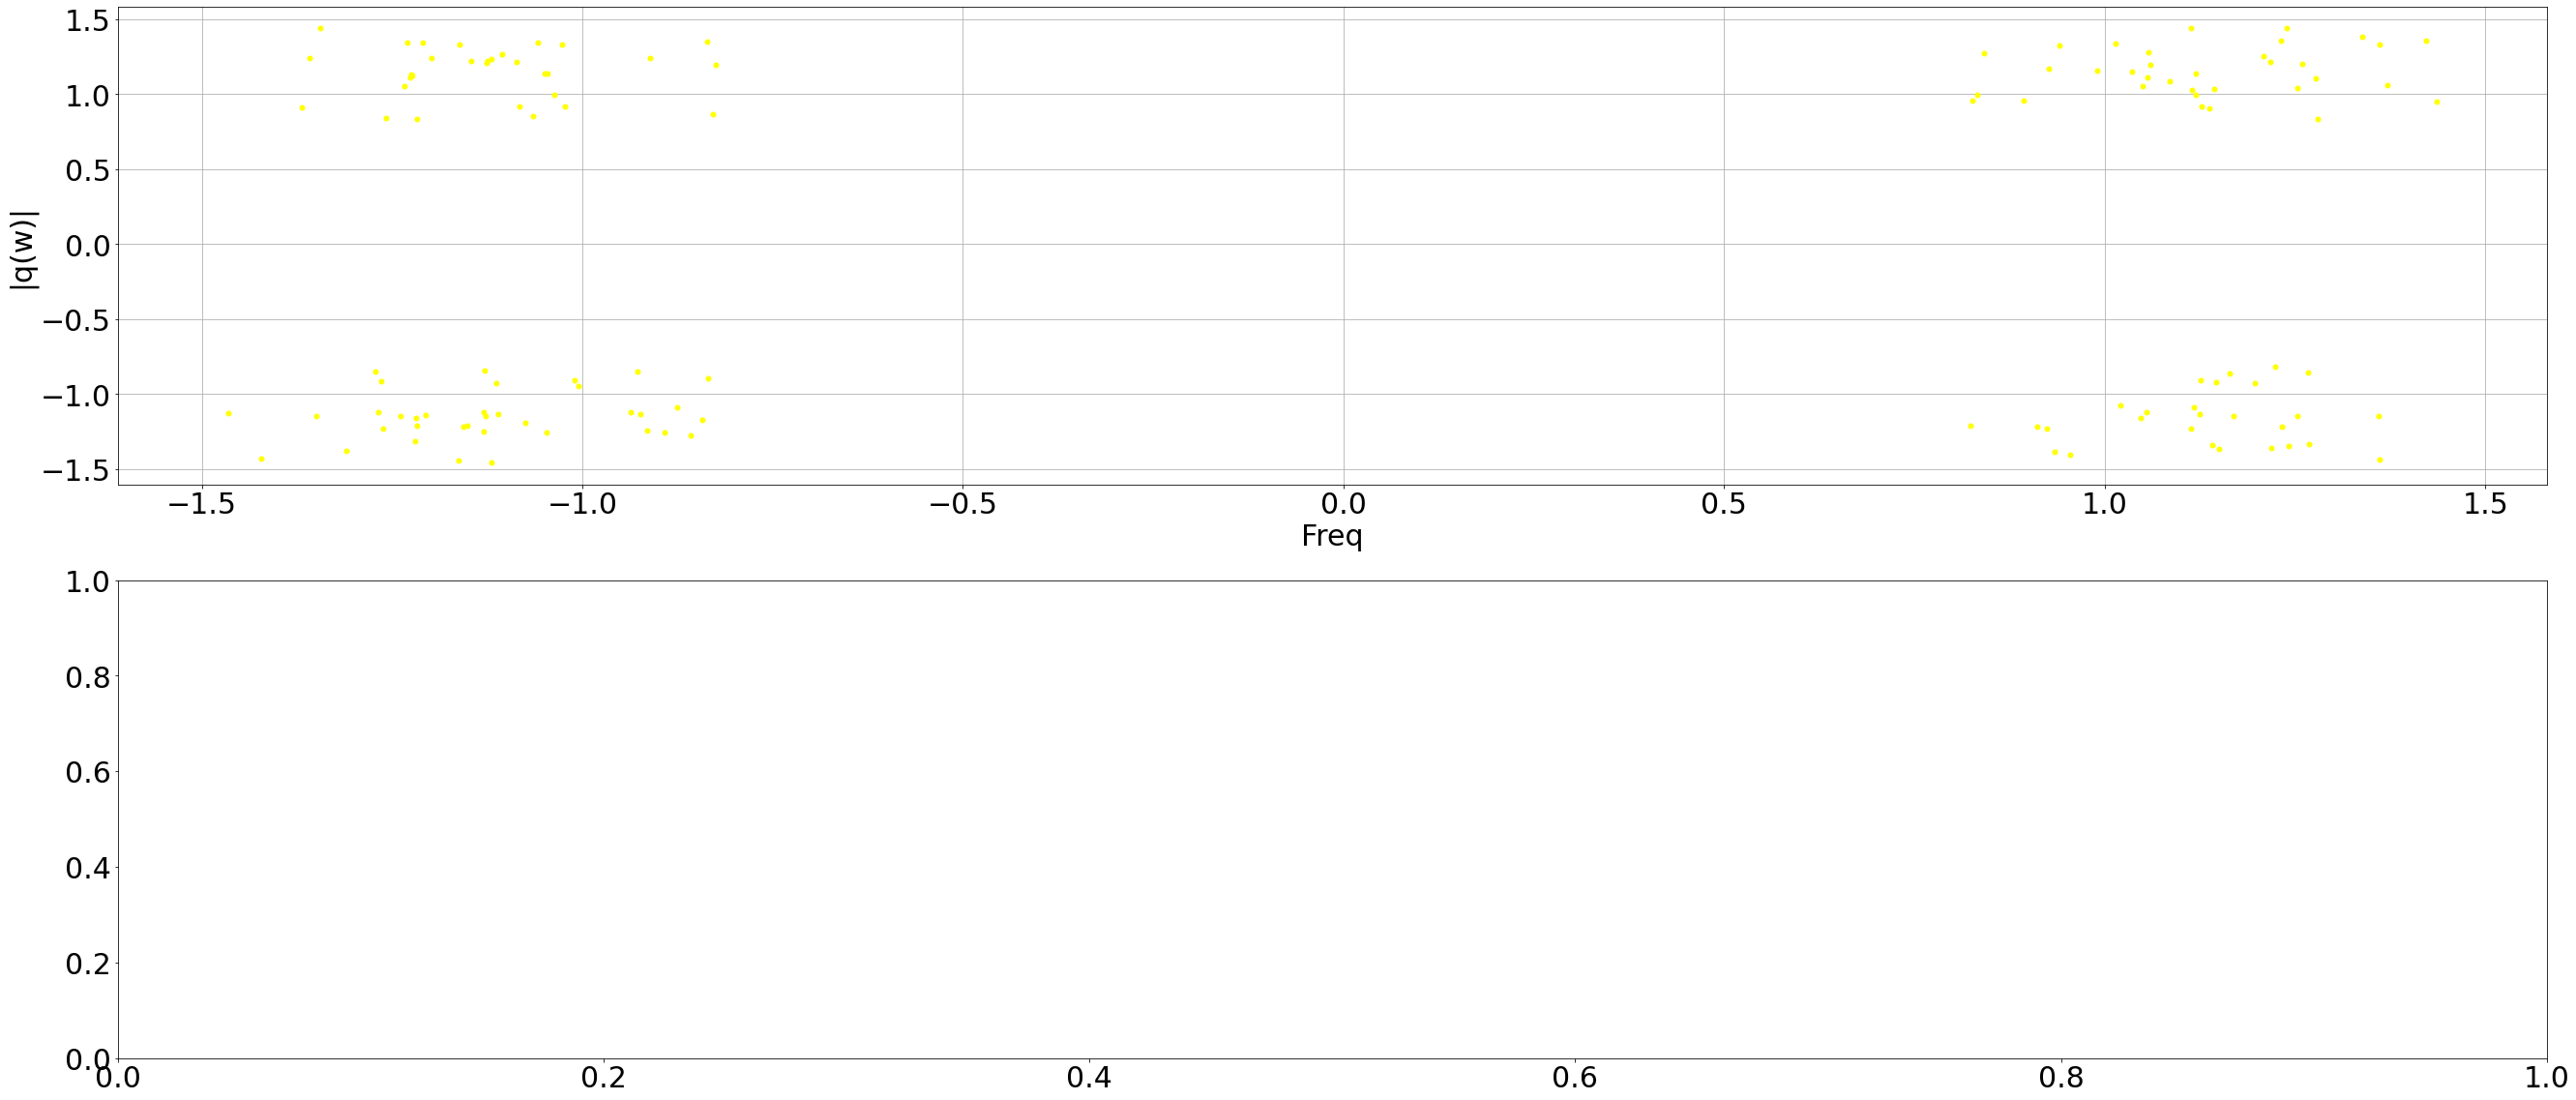

In [115]:
points_restored = []
for k in range(N):
    points_restored.append(qW[60+ k * os + os // 2])

# print(points_restored)
print(os // 2)

matplotlib.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(2, 1, figsize=(45,20))

plt_ind = 0
axs[plt_ind].plot(np.real(points_restored), np.imag(points_restored), marker='.', color='yellow', linewidth=0, markersize=10)
# axs[0].set_xlim(-10, 10)
axs[plt_ind].set_xlabel('Freq')
axs[plt_ind].set_ylabel('|q(w)|')
axs[plt_ind].grid(True)

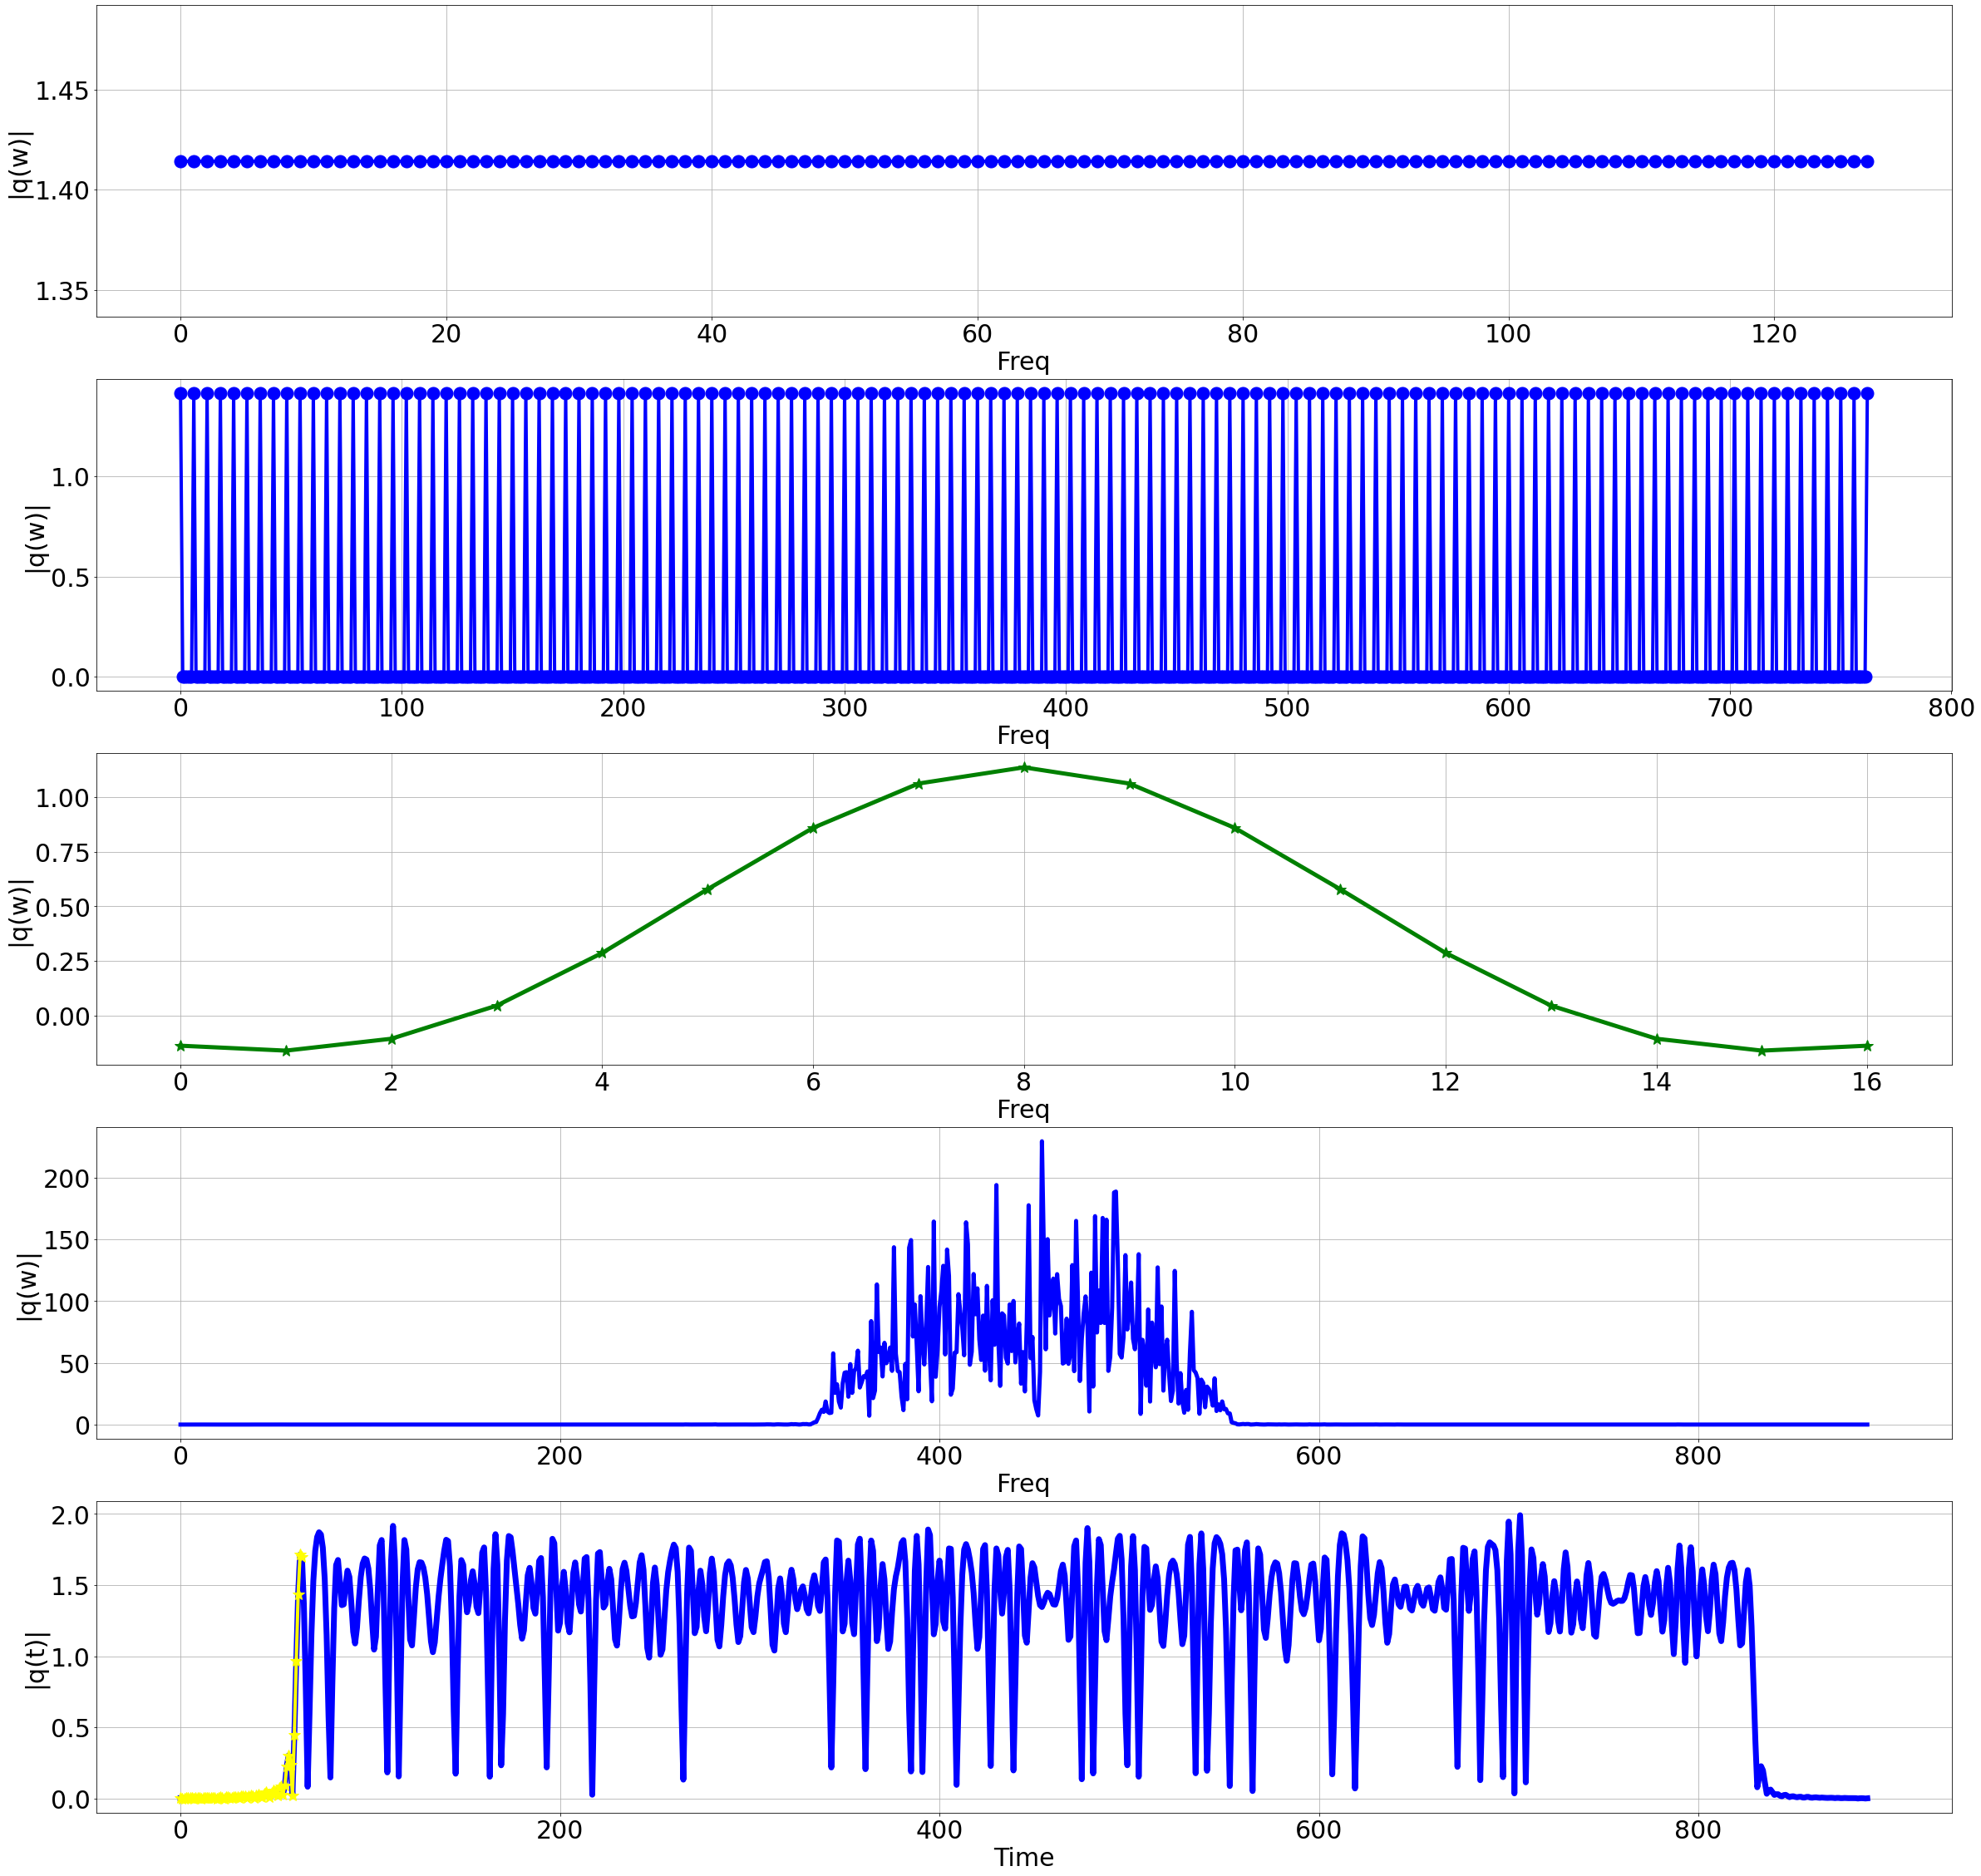

In [130]:
matplotlib.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(5, 1, figsize=(40,40))

plt_ind = 0
axs[plt_ind].plot(np.absolute(sQ), linestyle='-', marker='o', color='blue', linewidth=4, markersize=15)
# axs[0].set_xlim(-10, 10)
axs[plt_ind].set_xlabel('Freq')
axs[plt_ind].set_ylabel('|q(w)|')
axs[plt_ind].grid(True)


plt_ind += 1
axs[plt_ind].plot(np.absolute(sQ_upsampled), linestyle='-', marker='o', color='blue', linewidth=4, markersize=15)
# axs[0].set_xlim(-10, 10)
axs[plt_ind].set_xlabel('Freq')
axs[plt_ind].set_ylabel('|q(w)|')
axs[plt_ind].grid(True)

plt_ind += 1
axs[plt_ind].plot(sPSF[56:73], 'green', linewidth=5, marker='*', markersize=15)
# axs[0].set_xlim(-10, 10)
axs[plt_ind].set_xlabel('Freq')
axs[plt_ind].set_ylabel('|q(w)|')
axs[plt_ind].grid(True)

plt_ind += 1
axs[plt_ind].plot(np.absolute(fftshift(fft(qW))), 'blue', linewidth=5)
# axs[0].set_xlim(-10, 10)
axs[plt_ind].set_xlabel('Freq')
axs[plt_ind].set_ylabel('|q(w)|')
axs[plt_ind].grid(True)

plt_ind += 1
axs[plt_ind].plot(np.absolute(qW), 'blue', linewidth=7)
axs[plt_ind].plot(np.absolute(qW[0: 57+ 8]), 'yellow', linewidth=4, marker='*', markersize=15)
# axs[1].set_xlim(t[0], t[-1])
# axs[1].set_yscale('log')
axs[plt_ind].set_xlabel('Time')
axs[plt_ind].set_ylabel('|q(t)|')
axs[plt_ind].grid(True)

In [21]:
a = 10.3
c = 5.5

xi_span = 64.
n = 2 ** 12
dxi = xi_span / n

xi = np.array([i * dxi - xi_span / 2. for i in range(n)])

t_span = 128.0 * np.pi
dt = t_span / n
t = np.array([i * dt - t_span / 2. for i in range(n)])

r = ts.get_sech_shape(xi, a, c)
omega = fftshift(fft(r))

omega_slow = nft.get_omega_continuous(r, xi, t)

# fft is
# y[k] = np.sum(x * np.exp(-2j * np.pi * k * np.arange(n)/n))

# def get_omega_continuous(r, xi, t):
#     d_xi = xi[1] - xi[0]
#     n_t = len(t)
#     omega_r = np.zeros(n_t, dtype=complex)
#     for j in range(n_t):
#         exp_xi_t = np.exp(-1.0j * t[j] * xi)
#         # exp_xi_t = np.exp(1.0j * t[j] * xi)
#         omega_r[j] = 0.5 / np.pi * trapz(r * exp_xi_t, dx=d_xi)
#
#     return omega_r

(0.9999999999999997-2.8906536127342636e-15j)
64.0


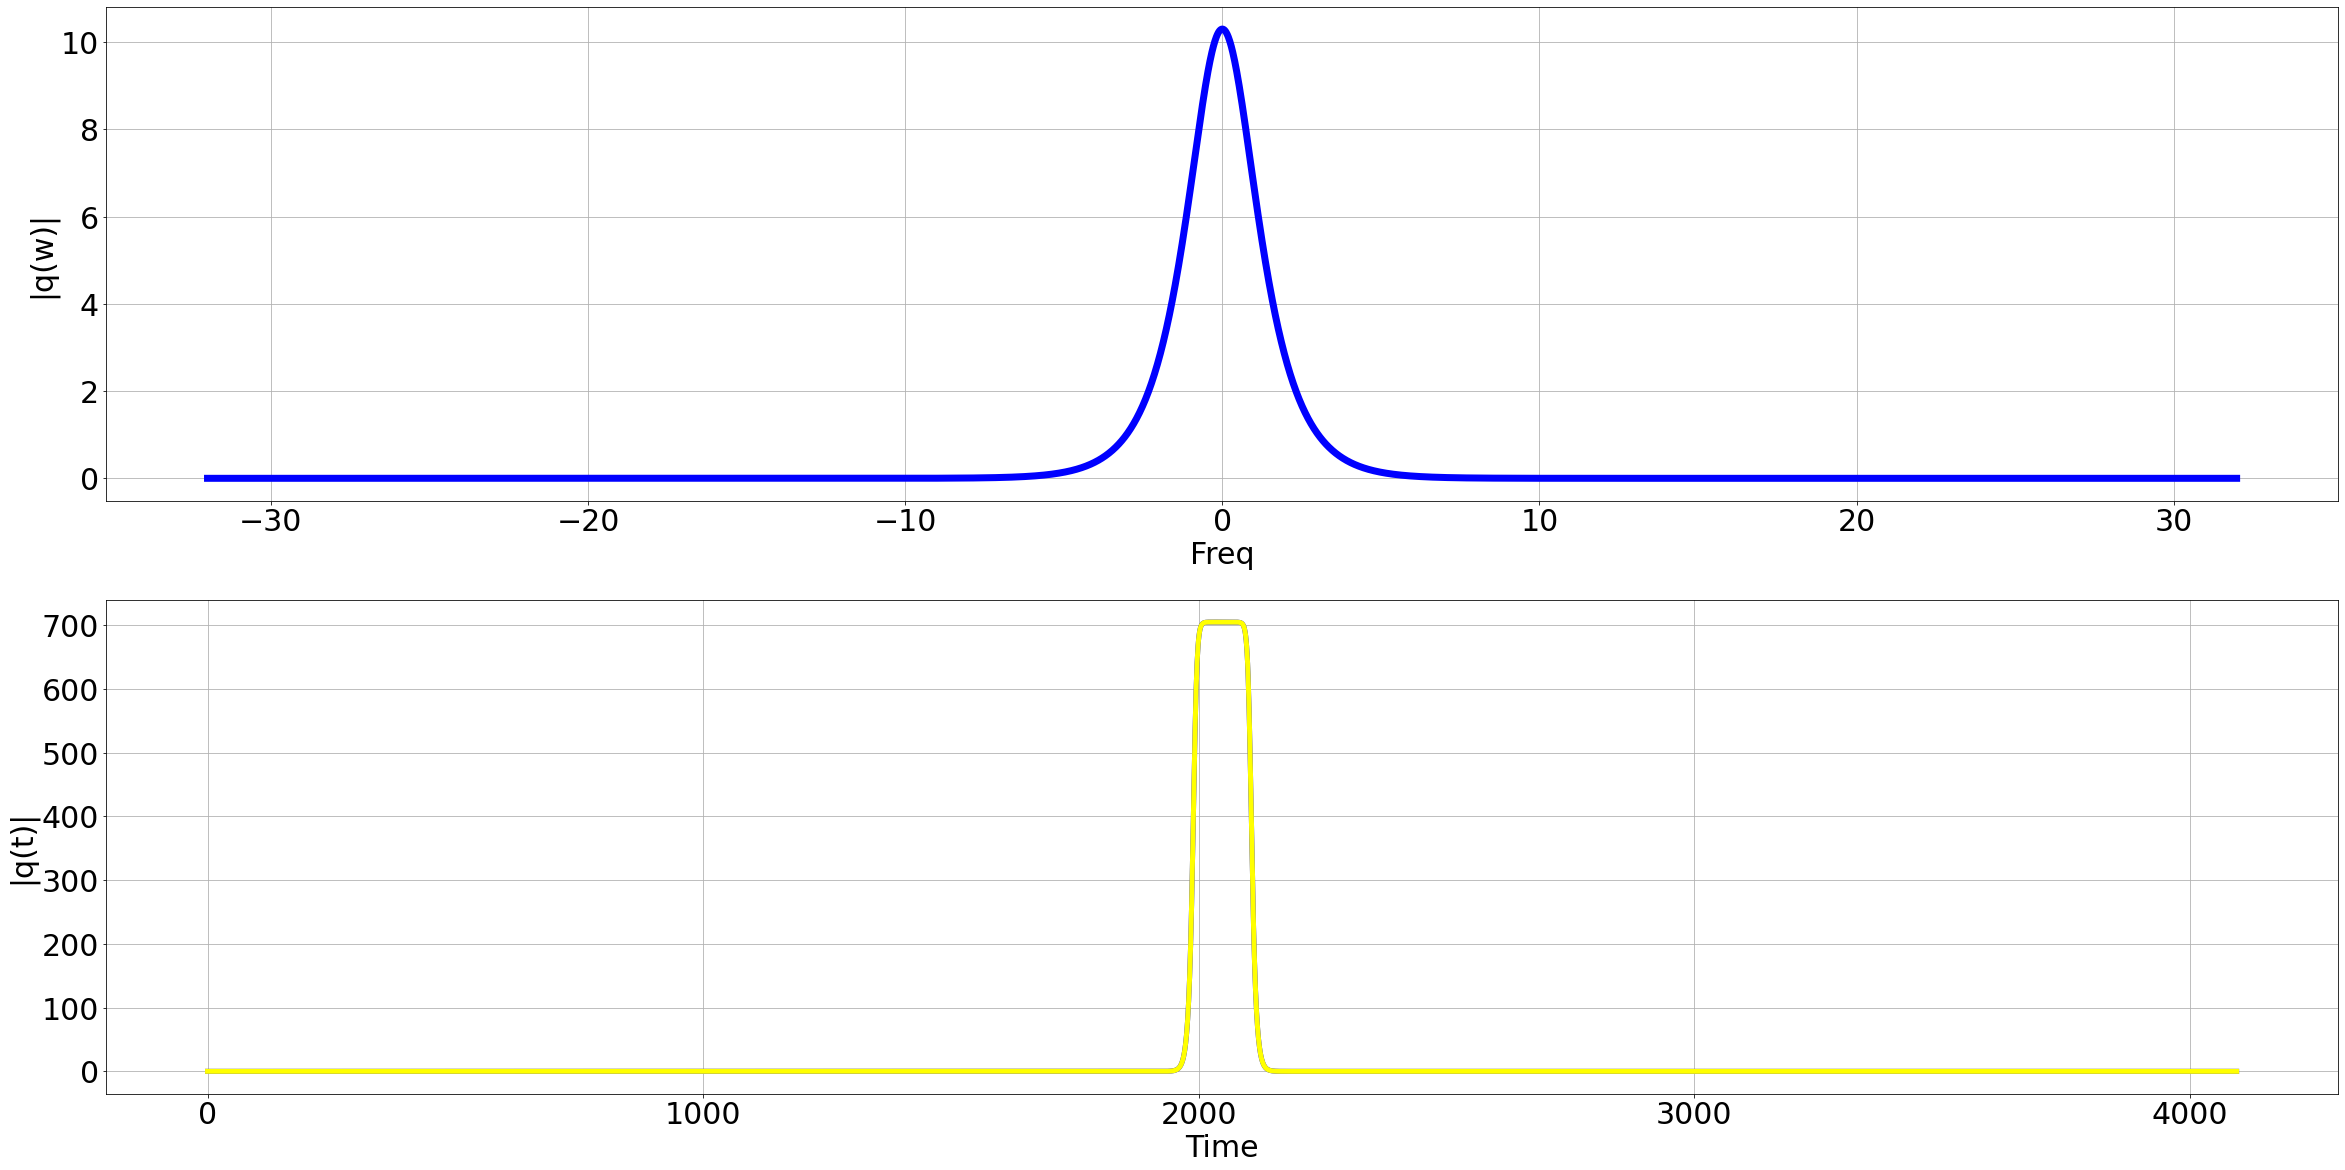

In [22]:
matplotlib.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(2, 1, figsize=(40,20))

plt_ind = 0
axs[plt_ind].plot(xi, np.absolute(r), 'blue', linewidth=7)
# axs[0].set_xlim(-10, 10)
axs[plt_ind].set_xlabel('Freq')
axs[plt_ind].set_ylabel('|q(w)|')
axs[plt_ind].grid(True)

coef = 2 * np.pi / dxi

plt_ind += 1
axs[plt_ind].plot(np.absolute(omega), 'blue', linewidth=5)
axs[plt_ind].plot(np.absolute(omega_slow * coef), 'yellow', linewidth=5)
# axs[1].set_xlim(t[0], t[-1])
# axs[1].set_yscale('log')
axs[plt_ind].set_xlabel('Time')
axs[plt_ind].set_ylabel('|q(t)|')
axs[plt_ind].grid(True)

print(np.max(omega) / np.max(omega_slow * coef))
print(1 / dxi)

In [ ]:
print(np.shape())

In [37]:
low_range = -1.0
up_range = 1.0
n_p = 2**20
x = np.random.rand(n_p)
print(np.shape(x))

a = datetime.now()
print(scipy.integrate.trapezoid(x))
b = datetime.now()
delta = b - a
print(delta, delta.seconds, delta.total_seconds() * 1000, delta.microseconds)

a = datetime.now()
print(np.trapz(x))
b = datetime.now()
delta = b - a
print(delta, delta.seconds, delta.total_seconds() * 1000, delta.microseconds)

a = datetime.now()
print(np.sum(x))
b = datetime.now()
delta = b - a
print(delta, delta.seconds, delta.total_seconds() * 1000, delta.microseconds)

a = datetime.now()
print(0.5 * (np.sum(x[0:len(x) - 1]) + np.sum(x[1:len(x)])) )
b = datetime.now()
delta = b - a
print(delta, delta.seconds, delta.total_seconds() * 1000, delta.microseconds)

(1048576,)
524543.8732796343
0:00:00.002932 0 2.932 2932
524543.8732796343
0:00:00.001978 0 1.9780000000000002 1978
524543.9824651064
0:00:00.000509 0 0.509 509
524543.8732796344
0:00:00.000961 0 0.9610000000000001 961


In [42]:
from FNFTpy import nsev
from FNFTpy import nsev_inverse, nsev_inverse_xi_wrapper


D = 2 ** 12
# M = 2*D
M = D
Tmax = 32
dtt = 2 * Tmax / (D - 1)
tvec = np.linspace(-Tmax, Tmax, D)
# calculate suitable frequency bonds (xi)
rv, xi = nsev_inverse_xi_wrapper(D, tvec[0], tvec[-1], M)
xivec = xi[0] + np.arange(M) * (xi[1] - xi[0]) / (M - 1)

temp_a = np.pi / dtt
print(temp_a, temp_a - temp_a / M, temp_a * (M - 1) / M, np.pi / (2 * Tmax) * (D-1)**2 / M)
print(xi[1] - xi[0])
print(xi[1], xi[0])
print(np.arange(3))

201.0128424445344 200.96376704354697 200.96376704354697 200.963767043547
200.963767043547
100.5064212222672 -100.45734582127979
[0 1 2]


In [8]:
x = 5
print(1 if x == 0 else 2 ** (x - 1).bit_length())

8
